In [84]:
# For division
from __future__ import division
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt

%matplotlib inline

# For reading stock data from yahoo
import pandas_datareader as web

# For time stamps
from datetime import datetime

In [85]:
# The tech stocks we'll use for this analysis
ticker = ['MSFT','TSLA']

# To Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 2,end.month,end.day)


# Creating loop for grabing yahoo finance data and setting as a dataframe

for stock in ticker:   
    
    #To set DataFrame as the Stock Ticker
    
    globals()[stock] = web.DataReader(stock,'yahoo',start,end)['Adj Close']

In [86]:
MSFT.head()

Date
2018-03-12    93.921074
2018-03-13    91.630577
2018-03-14    91.087044
2018-03-15    91.407333
2018-03-16    91.814964
Name: Adj Close, dtype: float64

In [87]:
MSFT.tail()

Date
2020-03-04    170.550003
2020-03-05    166.270004
2020-03-06    161.570007
2020-03-09    150.619995
2020-03-10    160.919998
Name: Adj Close, dtype: float64

In [88]:
MSFT.shape

(503,)

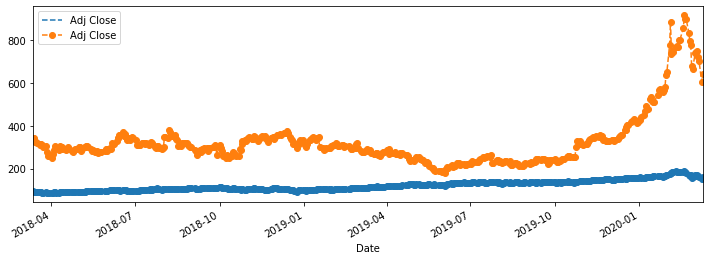

In [89]:
MSFT.plot(figsize=(12,4),legend=True, linestyle='--', marker='o')
TSLA.plot(figsize=(12,4),legend=True, linestyle='--', marker='o')



In [90]:
MSFT.describe()

count    503.000000
mean     121.478485
std       23.771629
min       84.613426
25%      103.418587
50%      113.004875
75%      137.113258
max      188.185989
Name: Adj Close, dtype: float64

In [91]:
df = MSFT
df.head()

Date
2018-03-12    93.921074
2018-03-13    91.630577
2018-03-14    91.087044
2018-03-15    91.407333
2018-03-16    91.814964
Name: Adj Close, dtype: float64

In [92]:
df.describe()

count    503.000000
mean     121.478485
std       23.771629
min       84.613426
25%      103.418587
50%      113.004875
75%      137.113258
max      188.185989
Name: Adj Close, dtype: float64

In [93]:
df = df.reset_index()

In [94]:
df.head()

,Date,Adj Close
0,2018-03-12,93.921074
1,2018-03-13,91.630577
2,2018-03-14,91.087044
3,2018-03-15,91.407333
4,2018-03-16,91.814964


In [95]:
df[['ds','y']] = df[['Date' ,'Adj Close']]

In [135]:
df = df[['ds','y']]
df.head(20)

mon2 = df

mon2['Weekday'] = mon2['ds'].dt.day_name()


mon2 =  mon2[(mon2['Weekday'] == 'Monday')]

mon2.head()


,ds,y,Weekday
0,2018-03-12,93.921074,Monday
5,2018-03-19,90.155304,Monday
10,2018-03-26,91.019112,Monday
14,2018-04-02,85.913963,Monday
19,2018-04-09,88.097717,Monday


In [97]:
# Importing the prophet library:

import fbprophet

In [98]:
# After importing the prophet library we need to create an instance of a Prophet object
#Instantiating: Instantiation − The creation of an instance of a class. Method − A special kind of function that is defined in a class definition. Object − A unique instance of a data structure that's defined by its class. An object comprises both data members (class variables and instance variables) and methods.
#https://www.tutorialspoint.com/python/python_classes_objects.htm

m = fbprophet.Prophet()

In [99]:
# Now we have to use the fit method on the prophet object and pass in our dataframe because we need to fit our model to our historical data.

m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [117]:
# Now it is time to create future dates, using Prophet and its builtin helper function "make_future_dataframe"

future = m.make_future_dataframe(periods=365)
future.head()

,ds
0,2018-03-12
1,2018-03-13
2,2018-03-14
3,2018-03-15
4,2018-03-16


In [119]:
# Now it is time to predict future stock prices using the predict method

forecast = m.predict(future)

forecast.tail(10)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
858,2021-03-01,271.550742,224.738820,311.125581,226.340079,312.634036,-1.411789,-1.411789,-1.411789,-1.411789,-1.411789,-1.411789,0.0,0.0,0.0,270.138953
859,2021-03-02,271.811935,225.617275,312.111614,226.528469,313.086224,-1.184376,-1.184376,-1.184376,-1.184376,-1.184376,-1.184376,0.0,0.0,0.0,270.627560
860,2021-03-03,272.073129,226.262059,314.035735,226.724504,313.538411,-0.923211,-0.923211,-0.923211,-0.923211,-0.923211,-0.923211,0.0,0.0,0.0,271.149918
861,2021-03-04,272.334322,225.621582,314.202883,226.924062,314.024157,-0.748483,-0.748483,-0.748483,-0.748483,-0.748483,-0.748483,0.0,0.0,0.0,271.585840
862,2021-03-05,272.595516,225.350856,314.939620,227.123621,314.498558,-0.913209,-0.913209,-0.913209,-0.913209,-0.913209,-0.913209,0.0,0.0,0.0,271.682307
863,2021-03-06,272.856709,229.890521,317.504991,227.232879,314.877566,2.590534,2.590534,2.590534,2.590534,2.590534,2.590534,0.0,0.0,0.0,275.447243
864,2021-03-07,273.117903,229.170875,318.138483,227.330336,315.346998,2.590534,2.590534,2.590534,2.590534,2.590534,2.590534,0.0,0.0,0.0,275.708436
865,2021-03-08,273.379096,224.673013,313.689405,227.436437,315.818381,-1.411789,-1.411789,-1.411789,-1.411789,-1.411789,-1.411789,0.0,0.0,0.0,271.967307
866,2021-03-09,273.640290,224.765252,316.122818,227.522244,316.289765,-1.184376,-1.184376,-1.184376,-1.184376,-1.184376,-1.184376,0.0,0.0,0.0,272.455914
867,2021-03-10,273.901483,225.233825,315.035376,227.608051,316.761148,-0.923211,-0.923211,-0.923211,-0.923211,-0.923211,-0.923211,0.0,0.0,0.0,272.978272


In [219]:
forecast['Weekday'] = forecast['ds'].dt.day_name()

forecast

mon =  forecast[(forecast['Weekday'] == 'Monday')]

mon = mon[['ds','yhat']]

Stockpre = pd.merge(mon, mon2, on ='ds')

Stockpre["tom"] = Stockpre["yhat"].shift(-1)

Stockpre.head(50)

,ds,yhat,y,Weekday,tom
0,2018-03-12,87.099479,93.921074,Monday,87.901119
1,2018-03-19,87.901119,90.155304,Monday,88.702760
2,2018-03-26,88.702760,91.019112,Monday,89.504401
3,2018-04-02,89.504401,85.913963,Monday,90.306041
4,2018-04-09,90.306041,88.097717,Monday,91.107682
5,2018-04-16,91.107682,91.397629,Monday,91.909323
6,2018-04-23,91.909323,92.542877,Monday,92.710968
7,2018-04-30,92.710968,90.766754,Monday,93.512615
8,2018-05-07,93.512615,93.387268,Monday,94.314263
9,2018-05-14,94.314263,95.143990,Monday,95.115911


In [222]:
yhat = delta = total = cost = 0.0
status = "cash"
first = Stockpre['y'][0]
final = Stockpre['y'].iloc[-1]
boring = final - first
tradecount = 0


for index, row in Stockpre.iterrows():
    print(f" On {row['ds']}")
    #check predicition value for next week "yhat" vs the current ticker value "current"
    if row['tom'] >= row['y']:
        #If holding cash, initiate buy, set cost to current stock price 'y' 
        #reset "current" for comparison, change status to holding stock 
        if status == "cash":
            cost = row['y']
            print(f" bought stock @ {cost}: price {row['y']} vs {row['tom']} ")
            status = "hold"
        
        elif status == "hold":
            print(f" held stock @ cost {cost} : price {row['y']} vs {row['tom']}")

    elif row['tom'] < row['y']:
        if status == "hold":
            print(f" sold @ cost {cost} : price {row['y']} vs {row['tom']}")
            delta = row['y'] - cost
            total = total + delta
            status = "cash"
            cost = 0.0
            print(f" profit {delta}")
        elif status == "cash" :
            print(f" held cash : price {row['y']} vs {row['tom']}")

if status == "hold":
    delta = final - cost
    total = total + delta 
    print(f"Final Networth :  cash {total}") 
                  
if status == "cash":
    print(f"Final Networth :  cash {total}")

print(f"If you had bought and held from day 1, {first} to {final}, you'd have made {boring} ")


 On 2018-03-12 00:00:00
 held cash : price 93.92107391357422 vs 87.90111933009285
 On 2018-03-19 00:00:00
 held cash : price 90.15530395507812 vs 88.70276002226367
 On 2018-03-26 00:00:00
 held cash : price 91.01911163330078 vs 89.50440071443451
 On 2018-04-02 00:00:00
 bought stock @ 85.9139633178711: price 85.9139633178711 vs 90.30604138621662 
 On 2018-04-09 00:00:00
 held stock @ cost 85.9139633178711 : price 88.09771728515625 vs 91.10768204984272
 On 2018-04-16 00:00:00
 held stock @ cost 85.9139633178711 : price 91.39762878417969 vs 91.9093227134662
 On 2018-04-23 00:00:00
 held stock @ cost 85.9139633178711 : price 92.54287719726562 vs 92.7109675146591
 On 2018-04-30 00:00:00
 held stock @ cost 85.9139633178711 : price 90.76675415039062 vs 93.5126154190275
 On 2018-05-07 00:00:00
 held stock @ cost 85.9139633178711 : price 93.38726806640625 vs 94.31426332339555
 On 2018-05-14 00:00:00
 sold @ cost 85.9139633178711 : price 95.14398956298828 vs 95.11591123085569
 profit 9.23002624

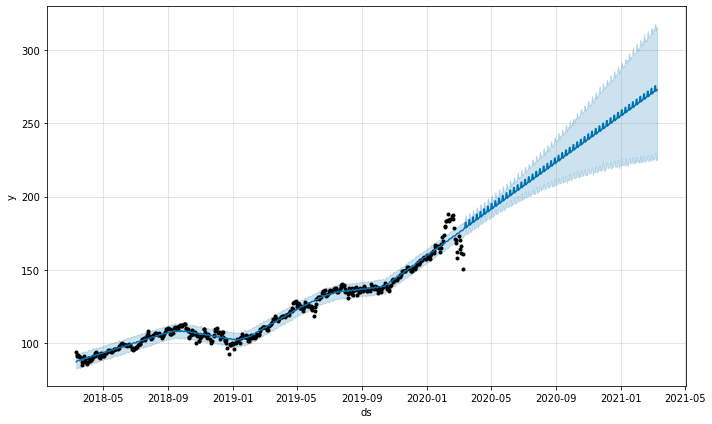

In [130]:
# Visualisation:

m.plot(forecast);

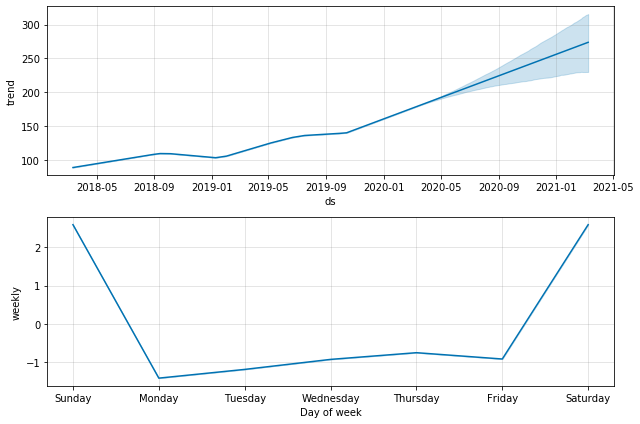

In [103]:
# If you want to visualize the individual forecast components, you can use Prophet’s built-in plot_components method:

m.plot_components(forecast);

In [104]:
df.describe()

,y
count,503.000000
mean,121.478485
std,23.771629
min,84.613426
25%,103.418587
50%,113.004875
75%,137.113258
max,188.185989


In [105]:
df.shape

(503, 2)

In [106]:
forecast.shape

(868, 16)

In [107]:
forecast.describe()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
count,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.0,868.0,868.0,868.000000
mean,166.182837,155.031498,175.785383,159.014253,172.983817,-0.600141,-0.600141,-0.600141,-0.600141,-0.600141,-0.600141,0.0,0.0,0.0,165.582696
std,57.156959,49.463181,65.939538,47.368800,67.162555,1.197968,1.197968,1.197968,1.197968,1.197968,1.197968,0.0,0.0,0.0,57.624084
min,88.511268,82.578917,91.660674,88.511268,88.511268,-1.411789,-1.411789,-1.411789,-1.411789,-1.411789,-1.411789,0.0,0.0,0.0,87.099479
25%,109.008466,103.121955,112.629387,109.008466,109.008466,-1.184376,-1.184376,-1.184376,-1.184376,-1.184376,-1.184376,0.0,0.0,0.0,107.796332
50%,151.662941,145.930348,155.668415,151.662941,151.662941,-0.923211,-0.923211,-0.923211,-0.923211,-0.923211,-0.923211,0.0,0.0,0.0,150.744731
75%,217.287799,205.549947,227.811229,207.244103,226.980487,-0.748483,-0.748483,-0.748483,-0.748483,-0.748483,-0.748483,0.0,0.0,0.0,217.137784
max,273.901483,232.892233,317.810000,230.131164,315.720979,2.590534,2.590534,2.590534,2.590534,2.590534,2.590534,0.0,0.0,0.0,275.708436
